In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [46]:
df = pd.read_csv("AirBookingDirekt24/AirBookingDirekt24_training.csv")

In [47]:
df

,id,preis,endreinigung,typ,stadt,stadtteil,lat,lon,bewertungen,bewertung,...,badewanne,kaffeemaschine,geschirrspueler,ebenerdig,kuehlschrank,rauchen,haustiere,hochstuhl,kinderkrippe,spielekonsole
0,10000,160.0,1,Apartment,SF,Noe Valley,37.743109,-122.429418,10,96,...,0,0,0,0,0,0,0,0,0,0
1,10001,200.0,1,Apartment,NYC,Battery Park City,40.718417,-74.015227,4,100,...,0,0,0,0,0,0,0,0,0,0
2,10002,85.0,0,Apartment,LA,Hollywood Hills,34.109349,-118.323667,5,92,...,0,0,0,0,0,0,0,0,0,0
3,10003,160.0,1,Apartment,NYC,Greenpoint,40.722155,-73.942034,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,130.0,1,Apartment,NYC,Kips Bay,40.740924,-73.979927,2,100,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,34995,NaN,1,Apartment,DC,Stronghold,38.925433,-77.007269,154,96,...,1,0,0,0,0,0,0,0,0,1
24996,34996,NaN,1,Apartment,Boston,North End,42.364847,-71.052334,94,89,...,0,0,0,0,0,0,1,0,0,0
24997,34997,NaN,1,Apartment,Boston,Dorchester,42.318314,-71.064099,43,93,...,0,1,0,0,1,0,0,0,0,0
24998,34998,NaN,1,Apartment,NYC,Lower East Side,40.716069,-73.984385,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.columns

Index(['id', 'preis', 'endreinigung', 'typ', 'stadt', 'stadtteil', 'lat',
       'lon', 'bewertungen', 'bewertung', 'gaeste', 'baeder', 'schlafzimmer',
       'betten', 'internet', 'wlan', 'kueche', 'heizung', 'klimaanlage',
       'haartrockner', 'familienfreundlich', 'buegeleisen', 'waschmaschine',
       'trockner', 'rauchmelder', 'kohlenmonoxidmelder', 'feuerloescher',
       'erstehilfekoffer', 'fernsehen', 'kabelfernsehen', 'fruehstueck',
       'kamin', 'fahrstuhl', 'pool', 'fitnessstudio', 'whirlpool',
       'rollstuhlgeeignet', 'bettwaesche', 'mikrowelle', 'geschirr', 'ofen',
       'herd', 'badewanne', 'kaffeemaschine', 'geschirrspueler', 'ebenerdig',
       'kuehlschrank', 'rauchen', 'haustiere', 'hochstuhl', 'kinderkrippe',
       'spielekonsole'],
      dtype='object')

In [49]:
df.stadtteil.fillna("Mitte", inplace=True)

df1 = df.copy()

df1["typ"]
LabelEncoder().fit_transform(df1["typ"])

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
df1["typ"] = LabelEncoder().fit_transform(df1["typ"])
df1["stadt"] = LabelEncoder().fit_transform(df1["stadt"])
df1["stadtteil"] = LabelEncoder().fit_transform(df1["stadtteil"])

In [55]:
traindata = df1.loc[df["preis"].notnull()]

In [56]:
train2 = traindata[['endreinigung', 'typ', 'stadt', 'stadtteil', 'lat',
       'lon', 'bewertungen', 'bewertung', 'gaeste', 'baeder', 'schlafzimmer',
       'betten', 'internet', 'wlan', 'kueche', 'heizung', 'klimaanlage',
       'haartrockner', 'familienfreundlich', 'buegeleisen', 'waschmaschine',
       'trockner', 'rauchmelder', 'kohlenmonoxidmelder', 'feuerloescher',
       'erstehilfekoffer', 'fernsehen', 'kabelfernsehen', 'fruehstueck',
       'kamin', 'fahrstuhl', 'pool', 'fitnessstudio', 'whirlpool',
       'rollstuhlgeeignet', 'bettwaesche', 'mikrowelle', 'geschirr', 'ofen',
       'herd', 'badewanne', 'kaffeemaschine', 'geschirrspueler', 'ebenerdig',
       'kuehlschrank', 'rauchen', 'haustiere', 'hochstuhl', 'kinderkrippe',
       'spielekonsole']]

In [57]:
# regr = make_pipeline(StandardScaler(), RandomForestRegressor())
# regr = make_pipeline(StandardScaler(), RandomForestRegressor())
regr = make_pipeline(StandardScaler(), RandomForestRegressor())


In [58]:
lr = LinearRegression()

X_train = train2.values
 
Y_train = traindata["preis"]
 
# lr.fit(X_train,Y_train)  
regr.fit(X_train,Y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [59]:
Y_predict = regr.predict(X_train)

diff = Y_predict - Y_train

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.51990727e-03,
        2.39391190e-02, 5.66979135e-02, 1.27255317e-01, 2.43171051e-01,
        5.56899506e-01, 1.08859994e+00, 1.87355105e+00, 2.73913920e+00,
        3.41069449e+00, 3.30863824e+00, 2.84875517e+00, 2.15704062e+00,
        1.59132144e+00, 1.15285757e+00, 8.89527265e-01, 6.47616168e-01,
        5.11541175e-01, 3.38927527e-01, 2.91049289e-01, 2.38131237e-01,
        1.80173370e-01, 1.29775224e-01, 1.20955549e-01, 8.56768471e-02,
        8.31569398e-02, 5.41780062e-02, 6.80374962e-02, 4.66182844e-02,
        2.77189799e-02, 3.02388872e-02, 1.51194436e-02, 2.64590263e-02,
        2.26791654e-02, 1.13395827e-02]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -

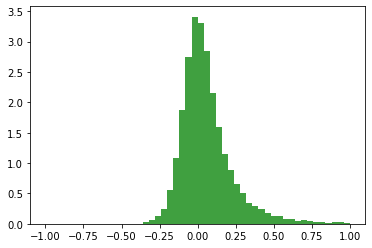

In [60]:
reldiff = (Y_predict - Y_train) / Y_train
plt.hist(reldiff, 50, range=(-1, 1), density=True, facecolor='g', alpha=0.75)

In [61]:
reldiff.describe()

count    20000.000000
mean         0.073499
std          0.323168
min         -0.392553
25%         -0.045541
50%          0.029135
75%          0.130552
max         30.488000
Name: preis, dtype: float64

In [18]:
reldiff.describe()

count    181572.000000
mean          0.074043
std           0.337746
min          -0.920746
25%          -0.076368
50%           0.010199
75%           0.140508
max          22.846620
Name: preis, dtype: float64

In [62]:
testdata = df1.loc[df["preis"].isnull()]

test2 = testdata[['endreinigung', 'typ', 'stadt', 'stadtteil', 'lat',
       'lon', 'bewertungen', 'bewertung', 'gaeste', 'baeder', 'schlafzimmer',
       'betten', 'internet', 'wlan', 'kueche', 'heizung', 'klimaanlage',
       'haartrockner', 'familienfreundlich', 'buegeleisen', 'waschmaschine',
       'trockner', 'rauchmelder', 'kohlenmonoxidmelder', 'feuerloescher',
       'erstehilfekoffer', 'fernsehen', 'kabelfernsehen', 'fruehstueck',
       'kamin', 'fahrstuhl', 'pool', 'fitnessstudio', 'whirlpool',
       'rollstuhlgeeignet', 'bettwaesche', 'mikrowelle', 'geschirr', 'ofen',
       'herd', 'badewanne', 'kaffeemaschine', 'geschirrspueler', 'ebenerdig',
       'kuehlschrank', 'rauchen', 'haustiere', 'hochstuhl', 'kinderkrippe',
       'spielekonsole']]

In [63]:

Y = regr.predict(test2.values)

In [64]:
solution = pd.DataFrame({"id": testdata["id"], "preis": Y})
solution.preis.describe()

count    5000.000000
mean      219.225074
std       146.277789
min        72.060000
25%       132.805000
50%       175.190000
75%       242.945000
max      1483.440000
Name: preis, dtype: float64

In [65]:
svs = solution.values

svs[:10][2]

array([30002.  ,   172.88])

In [67]:
with open("airbooking_solution1.txt", "w") as f:
    f.write("7a0915b82339cd78ad21718c2a8cc84569c46a01b5d84bf14cdc8b671ef96512\n")
    f.write("ab-test1\n")
    f.write("\n".join([str(int(line[0])) + " " + str(int(line[1])) for line in svs]) + "\n")